# <hack데이터셋>
*해커들이 서버에 접속하는데에 사용한 각 세션의 메타 데이터들을 포렌식 기술자들이 수집

*수집된 데이터
- Session_Connection_Time : 세션이 지속된 시간(분)입니다.
- Bytes Transferred : 세션 중에 전송된 데이터 용량(MB)입니다.
- Kali_Trace_Used : 해커의 Kali Linux 사용 여부입니다.
- Servers_Corrupted : 공격으로 손상된 서버 수 입니다.
- Pages_Corrupted : 무단으로 접근한 페이지 수 입니다.
- Location : 공격이 시작된 위치입니다.(해커들이 VPN을 사용했기 때문에 아마 쓸모가 없을 것 같습니다.)
- WPM_Typing_Speed : 세션 로그를 기준으로 예상한 타이핑 속도입니다.

*2명의 해커는 어느정도 확신하고 있지만 세 번째 해커가 해킹에 연루되었는지 불확실

*각 해커들의 공격횟수는 거의 동일

 k-최근접이웃분류방법
분류 문제를 해결하는 데 사용되는 알고리즘은 매우 다양하며, 최근에는 딥러닝에 많이 사용되는 인공신경망이 주목을 받고 있다. 여기서는 비교적 초창기에 개발된 k-최근접 이웃KNN.
K-Nearest Neighbor 분류의 기본 방법
• 1단계: 그룹을 모르는 데이터에 대해 이미 그룹이 알려진 데이터 중 P와 가장 가까이에 있는 k개의 데이터를 수집한다.
• 2단계: 찾은 k개의 데이터 중에서 데이터가 가장 많이 속한 그룹을 P의 그룹으로 정한다.

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('/hack_data.csv')
print(df.shape)
df.head()

(334, 7)


,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,Location,WPM_Typing_Speed
0,8.0,391.09,1,2.96,7.0,Slovenia,72.37
1,20.0,720.99,0,3.04,9.0,British Virgin Islands,69.08
2,31.0,356.32,1,3.71,8.0,Tokelau,70.58
3,2.0,228.08,1,2.48,8.0,Bolivia,70.80
4,20.0,408.50,0,3.57,8.0,Iraq,71.28


In [23]:
# Location은 VPN 때문에 의미 없음 → 제거
df = df.drop('Location', axis=1)

# 결측치 확인
print(df.isnull().sum())

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

Session_Connection_Time    0
Bytes Transferred          0
Kali_Trace_Used            0
Servers_Corrupted          0
Pages_Corrupted            0
WPM_Typing_Speed           0
dtype: int64


In [24]:
# 클러스터 수 실험 (2명, 3명 해커 가정)
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_3 = KMeans(n_clusters=3, random_state=42)

df['label_k2'] = kmeans_2.fit_predict(X_scaled)
df['label_k3'] = kmeans_3.fit_predict(X_scaled)

In [25]:
# 2명 해커 가정
X = df.drop(['label_k2', 'label_k3'], axis=1)
y = df['label_k2']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 예측 및 정확도
y_pred = knn.predict(X_test)
print("KNN Accuracy (2 clusters):", accuracy_score(y_test, y_pred))

KNN Accuracy (2 clusters): 1.0


In [26]:
y = df['label_k3']

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("KNN Accuracy (3 clusters):", accuracy_score(y_test, y_pred))


KNN Accuracy (3 clusters): 1.0


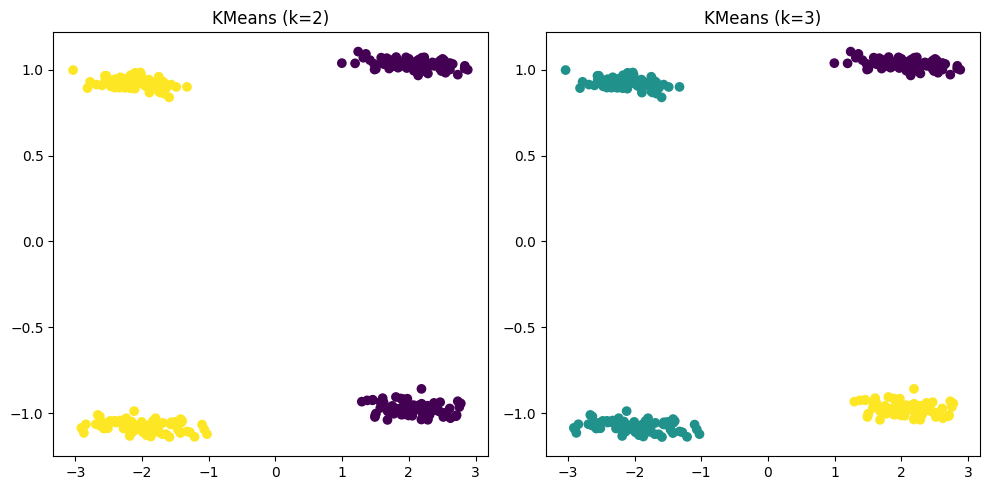

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("KMeans (k=2)")
plt.scatter(pca_result[:,0], pca_result[:,1], c=df['label_k2'], cmap='viridis')

plt.subplot(1,2,2)
plt.title("KMeans (k=3)")
plt.scatter(pca_result[:,0], pca_result[:,1], c=df['label_k3'], cmap='viridis')

plt.tight_layout()
plt.show()


In [28]:
from sklearn.metrics import silhouette_score

score_2 = silhouette_score(X_scaled, df['label_k2'])
score_3 = silhouette_score(X_scaled, df['label_k3'])

print(f"Silhouette Score (k=2): {score_2:.4f}")
print(f"Silhouette Score (k=3): {score_3:.4f}")


Silhouette Score (k=2): 0.6020
Silhouette Score (k=3): 0.5390


해커가 2명일 가능성이 높은 것으로 보임